### Softmax Regression from Scratch

The softmax function is used to convert a vector of logits (real-valued scores) into a probability distribution. It's widely used in multiclass classification problems.

#### Softmax Formula


Given a vector of logits 

( z = [z<sub>1</sub>, z<sub>2</sub>, ......, z<sub>n</sub>] ),

the softmax function for the  i-th element is defined as:


$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}
$$

Suppose we have logits 
𝑧=[2.0, 1.0, 0.1]
The softmax calculation is:

Compute exponentials:

𝑒<sup>2.0</sup>=7.389

𝑒<sup>1.0</sup>=2.718

𝑒<sup>0.1</sup>=1.105
 
Sum of exponentials = 7.389+2.718+1.105=11.212

Softmax probabilities:

𝜎(2.0)=7.389/11.212≈0.659

𝜎(1.0)=2.718/11.212≈0.242

𝜎(0.1)=1.105/11.212≈0.099

Thus, the resulting probability distribution is approximately:

[0.659, 0.242, 0.099]

This reflects that the highest logit (2.0) has the highest probability.



#### Library Import

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)




#### Dataset Preprocessing

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data 
y = iris.target

In [4]:
X.shape, y.shape


((150, 4), (150,))

In [5]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [6]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1,1))
print(y_encoded.shape)


(150, 3)


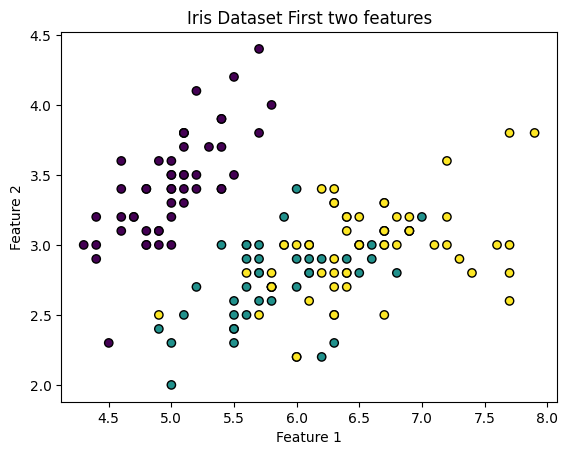

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Iris Dataset First two features')
plt.show()

#### Initialization

In [8]:
num_features = X.shape[1]
num_classes = len(np.unique(y))

# Weights and bias initialization

W = np.random.randn( num_features, num_classes)
b = np.zeros((1, num_classes))

# Softmax Definition

def softmax(logits):
    # subtraction to prevent potential numerical overflow
    #  when computing the exponential of large numbers.
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims= True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Cross entropy loss function

def cross_entropy_loss(y_true, y_pred):
    m = y_true.shape[0]
    # Ensure dimensions match by squeezing y_pred if necessary
    if y_true.shape != y_pred.shape:
        y_pred = y_pred.squeeze()
    #  Why Add 1e-9? Preventing mathematical error due to log(0)
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m
    return loss

def compute_gradients(X, y_true, y_pred):
    m = X.shape[0]
    dW = (1/m) * np.dot(X.T, (y_pred - y_true))
    db = (1/m) * np.sum(y_pred - y_true, axis=0, keepdims=True)
    return dW, db


#### Training

In [9]:
learning_rate = 0.1
num_epochs = 1000

loss_history = []

for epoch in range(num_epochs):
    logits = np.dot(X, W) + b

    y_pred = softmax(logits)

    loss = cross_entropy_loss(y_encoded, y_pred)
    loss_history.append(loss)

    dW, db = compute_gradients(X, y_encoded, y_pred)

    # Updating weights and biases

    W -= learning_rate * dW
    b -= learning_rate * db

    if epoch % 100 ==0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 10.3206
Epoch 100, Loss: 0.5086
Epoch 200, Loss: 0.2666
Epoch 300, Loss: 0.2198
Epoch 400, Loss: 0.1913
Epoch 500, Loss: 0.1718
Epoch 600, Loss: 0.1575
Epoch 700, Loss: 0.1466
Epoch 800, Loss: 0.1379
Epoch 900, Loss: 0.1309


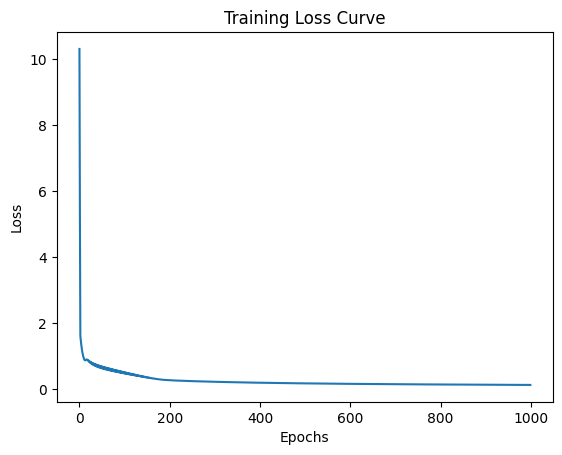

In [10]:
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

#### Prediction

In [11]:
def predict(X, W,b):
    logits = np.dot(X, W) + b
    y_pred = softmax(logits)
    return np.argmax(y_pred, axis = 1)

y_pred_labels = predict(X, W, b)

accuracy = np.mean(y_pred_labels == y)

print(f'Training Accuracy: {accuracy * 100:.2f}%')



Training Accuracy: 98.00%


#### Decision Boundaries

##### Dimensionality Reduction for Visualization

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_pca.shape

(150, 2)

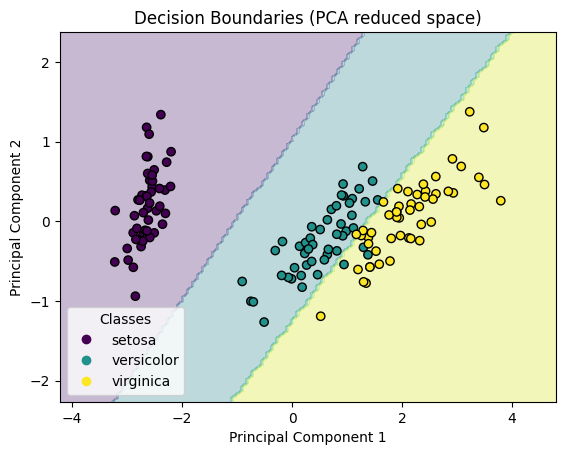

In [17]:
# Visualize the decision boundaries in the 2D PCA space

x_min, x_max = X_pca[:, 0].min() -1, X_pca[:,0].max() + 1
y_min, y_max = X_pca[:, 1].min() -1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

grid_pts_original = pca.inverse_transform(grid_points)

Z = predict(grid_pts_original, W, b)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha = 0.3, cmap='viridis')
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolors='k', cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries (PCA reduced space)')

legend_labels = iris.target_names
handles, _ = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Classes")

plt.show()